In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import os
import numpy as np
sns.set_theme()

In [2]:
files = [file for file in os.listdir(".\\") if file.endswith(".csv")]

In [3]:
data_list = {}
df = pd.DataFrame([])
for file in files:
    data = pd.read_csv(file)
    data_list[file] = data
    df = pd.concat([df, pd.DataFrame([data["accuracy"].mean(), data["accuracy"].std(), data["best_epoch"].mean()]).T.rename(columns={0: "acc", 1: "std", 2: "epochs"}, index={0: file[:-4].replace("_", " ")})])
df.sort_values(by=['acc'], ascending=False)

,acc,std,epochs
pretrained xite tonic heat intense 4 0 1 0,88.996667,8.088684,5.958333
pretrained xite tonic intense 4 0 1 0,87.950417,8.864599,7.041667
pretrained xite tonic electric intense 4 0 1 0,87.628750,8.200020,6.958333
pretrained xite 2class intense 4 0 1 0,87.499583,11.874740,6.875000
pretrained xite 2class intense 4 1 1 0,87.001667,10.975298,8.666667
pretrained xite heat intense 4 0 1 0,86.751667,9.204508,9.041667
pretrained xite phasic heat intense 4 0 1 0,86.747917,7.769326,8.125000
pretrained xite phasic intense 4 0 1 0,86.307500,8.372511,11.625000
pretrained xite all intense 4 0 1 0,85.681667,8.379757,9.583333
pretrained xite strong intense 4 0 1 0,85.617500,10.854342,7.541667


In [4]:
# parse confusion matrix (saved as string in csv file) to float matrix
def parse_cm(s):
    rows = s.replace("nan", "0.").replace(" ", "").replace("\r", "").replace("\n", "")[2:-2].split("][")
    cm = []
    for row in rows:
        dots = [i for i in range(len(row)) if row[i] == '.']
        arr = [float(row[dots[-3]-1:dots[-2]-1]), float(row[dots[-2]-1:dots[-1]-1]), float(row[dots[-1]-1:])]
        cm.append(arr)
    return np.array(cm)

# calcualte confusion matrices mean over cross validation set
def calculate_mean_cm(filename):
    data = data_list[filename]["cm"][:]
    c = np.array([[0,0,0],[0,0,0],[0,0,0]])
    n = len(data)
    for x in data:
        c = c+parse_cm(x)
    return c/n

# display confusion matrices
# use two_class if only displaying the classes 0 and 1
def plot_cm(cm, two_class=False):
    cm = np.round(cm, 2)
    if two_class: 
        cm = cm[1:,1:]
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["same pain","pain -> no pain"])
    else:
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["no pain -> pain","same pain","pain -> no pain"])    
    cm_display.plot(cmap="Blues", colorbar=False)
    plt.title("Confusion Matrix", fontsize=16)
    plt.grid(False)
    plt.show()

In [9]:
cm = calculate_mean_cm(files[-2])

In [11]:
files

['pretrained_xite_2class_intense_1_0_1_0.csv',
 'pretrained_xite_2class_intense_4_0_1_0.csv',
 'pretrained_xite_2class_intense_4_1_1_0.csv',
 'pretrained_xite_all_intense_1_0_1_0.csv',
 'pretrained_xite_all_intense_4_0_1_0.csv',
 'pretrained_xite_all_intense_4_1_1_0.csv',
 'pretrained_xite_electric_intense_4_0_1_0.csv',
 'pretrained_xite_heat_intense_4_0_1_0.csv',
 'pretrained_xite_phasic_electric_intense_4_0_1_0.csv',
 'pretrained_xite_phasic_heat_intense_4_0_1_0.csv',
 'pretrained_xite_phasic_intense_4_0_1_0.csv',
 'pretrained_xite_strong_intense_4_0_1_0.csv',
 'pretrained_xite_tonic_electric_intense_4_0_1_0.csv',
 'pretrained_xite_tonic_heat_intense_4_0_1_0.csv',
 'pretrained_xite_tonic_intense_4_0_1_0.csv']

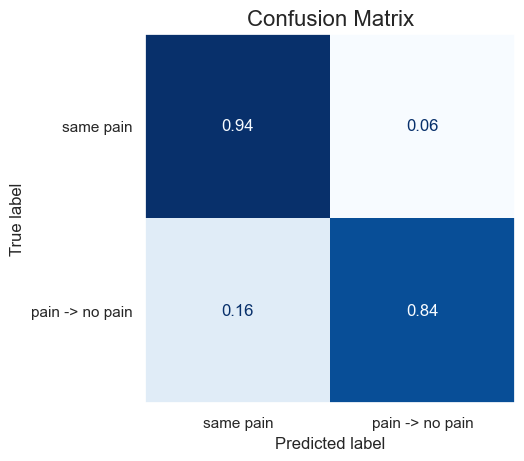

In [10]:
plot_cm(cm, two_class=True)